用scikit-learn和pandas学习线性回归

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [6]:
data = pd.read_csv('dataset/ccpp.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
data.shape

(9568, 5)

In [8]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [9]:
y = data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [13]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [15]:
print(linReg.intercept_)
print(linReg.coef_)

[460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


In [16]:
y_pred = linReg.predict(X_test)
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_test, y_pred))  # 用scikit-learn计算MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # 用scikit-learn计算RMSE

MSE: 20.837191547220346
RMSE: 4.564777272465804


In [17]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linReg, X, y, cv=9)
print("MSE:",metrics.mean_squared_error(y, predicted))  # 用scikit-learn计算MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))  # 用scikit-learn计算RMSE

MSE: 20.78951434732823
RMSE: 4.559551989760423


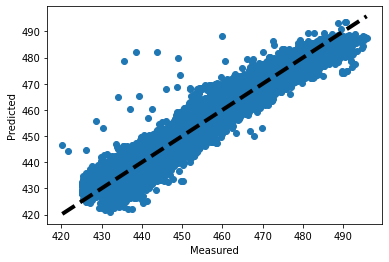

In [18]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()